In [ ]:
# Liz's Code for Regions

In [43]:
import pandas as pd
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [ ]:
# Load enigma dataset.
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head()

In [17]:
# first datetime conversion
usa['datetime'] = pd.to_datetime(usa['date'])

In [36]:
# remove uneeded columns
# drop unneeded colums
usa = usa.drop(columns = ["state_fips", "lat", "long"])


# New Englend Divsion 1
# North East Region

In [37]:
# Created DF based New Englend Divsion
new_englend = usa[(usa['state_name']=="Connecticut") | (usa['state_name'] == 'Maine') |
                      (usa['state_name'] == 'Massachusetts') | (usa['state_name'] == 'New Hampshire') | \
                     (usa['state_name']=='Rhode Island')| (usa['state_name'] =='Vermont')]
new_englend.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
900,Rhode Island,3/1/2020,2,0,2.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2020-03-01
901,Rhode Island,3/2/2020,2,0,2.0,3.0,NaN,5.0,NaN,NaN,NaN,NaN,2020-03-02
902,Rhode Island,3/3/2020,2,0,2.0,5.0,NaN,7.0,NaN,NaN,NaN,NaN,2020-03-03
903,Rhode Island,3/4/2020,2,0,2.0,15.0,NaN,17.0,NaN,NaN,NaN,NaN,2020-03-04
904,Rhode Island,3/5/2020,2,0,3.0,19.0,NaN,22.0,NaN,NaN,NaN,NaN,2020-03-05


# Fucntion for Making Regions-works except for when it is called it is not printing out in the right form.

In [33]:
def make_region(df):
    '''function to make regions'''
    df = df.groupby(["datetime"]).sum()
    df.sort_values(by = "datetime")
    df=df.reset_index()
    df['datetime'] = pd.to_datetime(df['datetime'])
    df["day"] = df['datetime'].map(lambda x: x.day)
    df["month"] = df['datetime'].map(lambda x: x.month)
    df["year"] = df['datetime'].map(lambda x: x.year)
    print(df.head())

make_region(new_englend)

datetime  state_fips       lat       long  cases  deaths  tests_positive  \
0 2020-02-01          25  42.15652 -71.489592      1       0             0.0   
1 2020-02-02          25  42.15652 -71.489592      1       0             0.0   
2 2020-02-03          25  42.15652 -71.489592      1       0             0.0   
3 2020-02-04          25  42.15652 -71.489592      1       0             0.0   
4 2020-02-05          25  42.15652 -71.489592      1       0             0.0   

   tests_negative  tests_pending  tests  patients_icu  patients_hosp  \
0             0.0            0.0    0.0           0.0            0.0   
1             0.0            0.0    0.0           0.0            0.0   
2             0.0            0.0    0.0           0.0            0.0   
3             0.0            0.0    0.0           0.0            0.0   
4             0.0            0.0    0.0           0.0            0.0   

   patients_vent  recovered  day  month  year  
0            0.0        0.0    1      2  2

# CODE for NEW Englend Divsion

In [39]:
# Summing case count for New Englend
# Groupby to consolidate cases by entire region
new_englend = new_englend.groupby(["datetime"]).sum()

# sort by datetime and reset index
new_englend.sort_values(by ="datetime")
new_englend= new_englend.reset_index()

# now finsh date time conversion

new_englend['datetime'] = pd.to_datetime(new_englend['datetime'])
new_englend["day"] = new_englend['datetime'].map(lambda x: x.day)
new_englend["month"] = new_englend['datetime'].map(lambda x: x.month)
new_englend["year"] = new_englend['datetime'].map(lambda x: x.year)


# now create new column for growth rate
new_englend['growth_rate'] = new_englend['cases'].pct_change()
new_englend.head(1)


,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
0,2020-02-01,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,2020,NaN


# Sum Stats on New Englend Growth Rates 

In [40]:
new_englend['growth_rate'].describe()

count    178.000000
mean       0.084077
std        0.211686
min        0.000000
25%        0.002152
50%        0.006921
75%        0.064779
max        2.000000
Name: growth_rate, dtype: float64

# Visulize Growth Rate and Cases

Text(0.5, 1.0, 'New Englend Growth Rate')

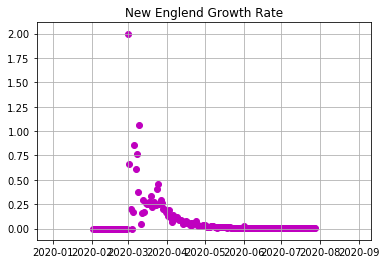

In [47]:
plt.scatter(new_englend["datetime"],new_englend["growth_rate"],c='m',)
plt.grid(True)
plt.title("New Englend Growth Rate")

Text(0.5, 1.0, 'New Englend Cases')

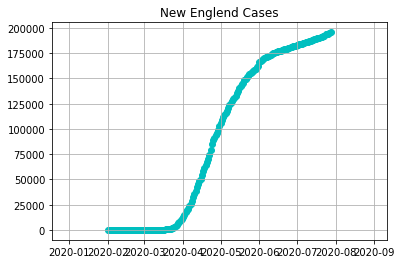

In [50]:
plt.scatter(new_englend["datetime"],new_englend["cases"],c='c',)
plt.grid(True)
plt.title("New Englend Cases")